# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The world consists of a grid of streets separated by blocks of "buildings". The streets have cars moving continually. Arrows on the streets show the direction in which the cars can move. Close to every block a red line can appear across a street representing a red light making the cars stop. 

In the middle of the streets there is a white car which represents the smartcab. A few trials were run consecutively. During a specific trial the smartcab is currently not moving at all. Although, it starts at a new position for every trial. The Udacity logo also appears somewhere on the grid each trial and probably represents the destination of the smartcab.

At this moment the agent is receiving rewards depending on actions taken or not taken. When standing by a red light the agent gets a positive reward when no action is taken but when standing by a green light the agent receives a negative reward for not taking an action.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

1. Flags:
    - The num_dummies flag sets the number of dummy agents or cars addtional to the smartcab. Less dummy agents makes the environment less complex (i.e. the smartcab woulnd't have to worry about crashing into other cars if the streets are empy) while more cars make it more difficult and slower for the agent to reach its destination. 
    - Alpha represents the learning rate of the model. The learning rate determines how much of the new information is used to update old information. A learning rate of 0 means that it will not learn anything and a learning rate of 1 means that only the most recent information is taken into account.
    - The enforce_deadline makes the task finite in time. If no additional cost exists for movement then practically any path would work in a world where the deadline is not enforced making the problem easier to solve. If the deadline is enforced then the agent has to reach its destination before the time runs out and thus feels obligated to learn how to reach the destination fast. 
    
2. The function that is called when an agent performs an action is the act() function in the Environment class. It checks if the action is legal before performing it and returns a reward according to the traffic laws.

3. The Simulator class simulates agents in a dynamic environment. Within this class, the render() function creates a GUI render display of the simulation using PyGame. In other words, it creates a visual dynamic representation of the simulation. In contrast, the render_text() function creates a non-GUI render display. It shows the simulated trial data in text format directly in the terminal/command prompt.

4. After checking if the destination is at the location of the agent, the next_waypoint() function first considers if the destination is cardinally East or West of the location. This means that it considers the East-West direction first.

(Sources: https://en.wikipedia.org/wiki/Q-learning)

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


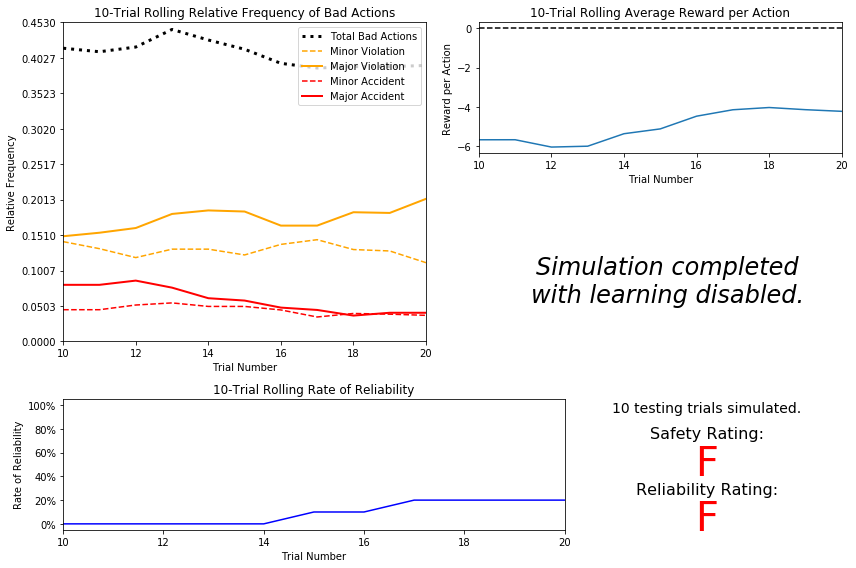

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

As expected with a random-choice agent, the results don't seem very promising. With a 10-trial rolling relative frequency of bad actions between 0.40 and 0.45 its seems like the driving agent is making bad decisions almost half of the time. Also, as seen in the first graph, around 25%-30% of the bad actions seem to cause minor or major accidents.

The driving agent received an "F" in its reliability rating. This score is confirmed in the 10-Trial rolling rate of reliability graph. The rate of reliabily starts at almost 0% and reaches a maximum of around 20%. This does makes sense given that the driving agent is choosing its actions randomly. If it were a fair coin we would expect about a 0.5 success rate of getting heads, for example, using random flips because both options are equally likely. This world is much more complex in which the goal is just one of many locations. The rate of 0%-20% makes sense because it is very difficult to reach the goal randomly in a finite number of states. 

Returning to the relative frequency of bad actions, we said that the driving agent is making bad actions a little less than half of the time. With even positive and negative rewards the average reward should intuitively tend to be closer to 0. Still,the 10-Trial rolling average reward per action graph shows a reward per action between -6 and -4. It would then seem that the driving agent es being penalized heavily for bad actions compared to the reward for good actions. This makes sense in this context because in the real world an accident could cause severe losses like the death of a person, while the benefits of arriving on time to the expected location are not as important.  

As the number of trials increases the graphs show some change but it is not significant. The reward is still relatively negative and the rate of reliability very low. Overall, the relative frequency of bad actions doesn't change much.

Considering all of the above, the driving agent is preforming very poorly in terms of reaching its destination, avoiding accidents, driving according to the law, etc. The conclusion is that it is not particularly safe or reliable for its passengers. In other words, it would probably not take them to their destination in the alotted time while exposing them to a significant risk of accidents.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

In terms of efficiency the 'waypoint' feature is intuitively the most relevant. The 'waypoint' feature shows the driving agent where to go, without that information in would have to move randomly until possibly finding the destination by chance. The 'deadline' feature also seems important for the driving agent to learn efficiency, but in this case the deadline is already enforced by other means and adding this feature would imply a significant increase of the state space. For this reason, the 'deadline' is not used for the agent's state.

The remaining features are 'light', 'left', 'right' and 'oncoming' from the sensor data. In a way these are all related to safety. In empty streets there would not be much to worry about, but given that the driving agent is sharing the streets with other agents it has to avoid colliding with them. The traffic lights are a way of signalling the right of way at an intersection and has to be obeyed by law. When the driving agent has to move out into the intersection it has to take into account the position and direction of the other cars. However, to reduce the state space even more, it is possible to remove the 'right' feature. During a green light, the car coming from the right would normally stand still. At a red light, the driving agent is allowed to make a right turn with caution. In this case, a car coming from the right can continue straight, turn left or right without interfering with the driving agent turning right.

In conclusion, the features chosen for the agent's state are 'waypoint', 'light', 'left' and 'oncoming'.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The chosen features have the following options:
- 'waypoint': ['forward', 'left', 'right']
- 'light': ['green', 'red']
- 'left': [None, 'forward', 'left', 'right']
- 'oncoming': [None, 'forward', 'left', 'right']

The possible combinations, and size of the state space, is 3x2x4x4 = 96

The learn() function that updates the Q-table is called after every action. Taking into account that in the current setting the driving agent starts off making around 20-30 actions per trial and the update_delay flag is set to about 10 ms between each steps, makes it quite reasonable that the driving agent can learn a policy for each state in a reasonable number of training trials. Although this also depends on the exploration rate. If epsilon decays slowly the agent is allowed to explore more and can visit more states quickly. If epsilon decays too quickly the agent would start to take more actions based on policy, choosing certain actions more even though other unexplored actions might lead to better rewards.  

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time. (False)
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial. (2.0)
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`. (False)
- `'n_test'` - Set this to `'10'` to perform 10 testing trials. (0)
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation. (False)

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

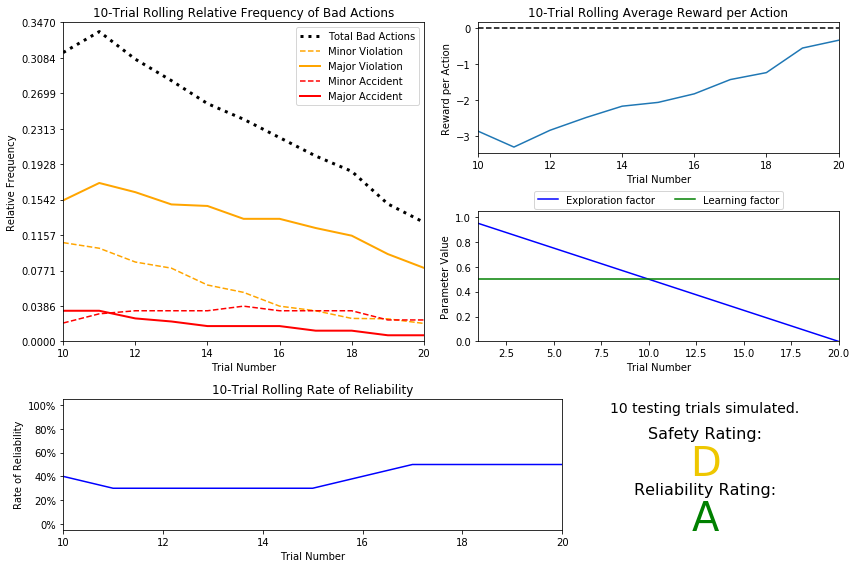

In [12]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

First of all, there is a noticeable improvement in both the safety and the reliability rating compared to the initial driving agent, moving from both receiving an F to a safety rating of D and a reliability rating of A. 

A big difference is that the initial driving agent chose actions randomly and thus didn't learn from experience. In layman words, the Q-Learning agent tries to remember the effect (reward) of certain actions and further along uses this information to choose actions that may lead to the best results. This can be seen in the two upper graphs. As the driving agent does more trials, the relative frequency of bad actions decreases and the average reward per action increases.

The driving agent did aproximately 20 training trials before testing. This makes sense given the epsilon-tolerance of 0.05 because the decay function is linear and subtracts 0.05 from epsilon for every trial. Starting with an epsilon of aproximately 1 results in 1/0.05 = 20 training trials. This decay is accurately represented in the parameters panel. As stated earlier the decay function is linear and negative, which is represented by a straight line with negative slope in the parameters panel.

Even though the reliability rate is considerably higher, a similarity between the initial driving agent and the Q-Learning driving agent is that it stays relatively constant through all the trials. Further improvements may be needed for the driving agent to learn how to move around the city to efficiently reach the destination.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

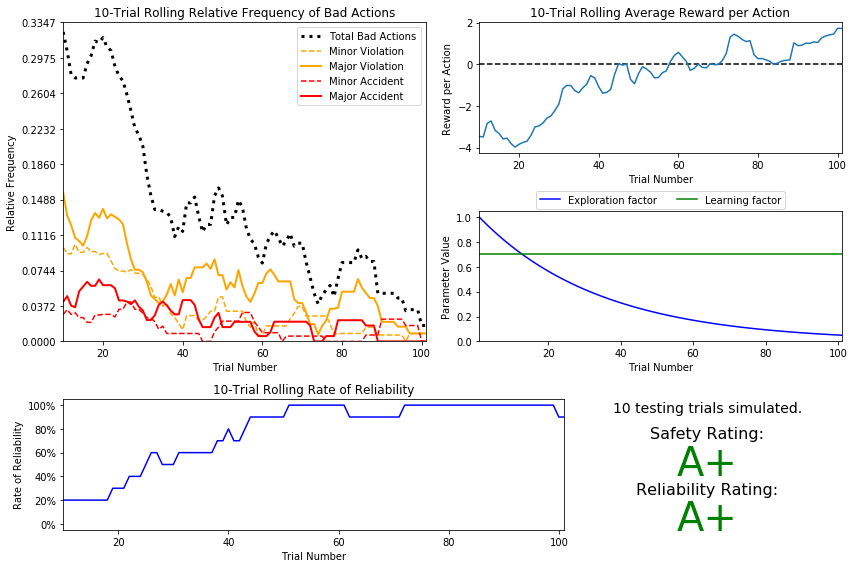

In [38]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

After several tests, the following decay function was chosen:
$$ \epsilon = e^{-at}, \textrm{for } 0 < a < 1$$

The driving agent seemed to learn better with a smoother and gradual decay and this decay function was chosen because it was flexible and intuitively easy to change the parameters in order to achieve the desired decay. 

The driving agent was achieving a 100% rate of reliability and a positive average reward per action at just above 70 trials. Still, during this particular training it was at its highest average reward per action at 100 trials when it finished and started testing. I chose to maintain the same epsilon-tolerance as before because at that point it is mostly acting based on its learned policy instead of exploring which is a reasonable real-life scenario. Addtionally, at that point the rate of change of epsilon is very low requiring increasingly more trials to reach a lower epsilon-tolerance.

The alpha rate chosen for this driving agent was 0.7. This parameter defines how important new information is while updating the Q-values. With an alpha of 1 the agent would practically just change the previous Q-value of an action for the value of the current reward. At the other extreme (alpha=0) the agent would not take into account new information. A low alpha value would lead to very slow learning, while a high alpha might cause the learning to be very volatile and maybe not converge to the optimal values for each action. Testing different values for alpha led to this value because it helped the agent to learn relatively fast and still take into account past information.

All of these changes seem to have had a positive effect on the Q-Learning agent in its ability to learn the rules of traffic and arrive at its destination on time. This agent achieved an A+ score on both the safety and relibility rates, coming from a D and an A respectively. In this sense, the agent has definitely learned an appropriate policy. Nevertheless, the ratings have to be evaluated in the light of the number of trials and the context of its application. I am certainly satisfied with the safety and reliability ratings of this virtual Smartcab during 10 trials. If we were implementing a real physical Smartcab to be used in a real city I would not be satisfied with the current results. A first step would be to have the car drive many more testing trials. Even one fatal accident out of 10.000 trials is a high number in a real world where these cars would be used daily by millions of people.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

Given that the agent is concretely trying to learn the U.S. right-of-way traffic laws. In this sense, the optimal policy should inform the driving agent that:
- It has to stop at a red light.
- There is one exception to the previous rule. In the U.S. it is permitted to make a right turn when the traffic light is red, if and only if there are no other cars that have a right-of-way driving to where the agent wants to go.
- When the light is green should not stand still and it can continue straight or turn right without restrictions. 
- At a green light it can turn to the left if there is no oncoming traffic which would then have the right-of-way.

For ease of understanding, each state in the dictionary has the following information: state = (waypoint, inputs['light'], inputs['left'], inputs['oncoming'])

Evaluating the 'sim_improved-learning.txt' text file shows that the driving agent has learned the right policy for most of the states. Here are some examples of optimal policies:

- ('right', 'red', 'forward', None)
 -- forward : -27.76
 -- right : -14.24
 -- None : 0.45
 -- left : -35.82
 
Here the driving agent would be standing at a red light wanting to turn right. This would be allowed in some cases, but here there is an agent coming from the left intending to continue straight through the intersection. Turning right would then lead to an accident. The policy gives a positive reward for standing still, strong negative rewards for moving forward or to the left at a red light and a negative reward for turning right at a red light with another car coming straight from the left.
 
- ('forward', 'green', 'left', None)
 -- forward : 2.25
 -- right : 0.77
 -- None : -5.54
 -- left : 0.21
 
In this case the car has arrived to a green light and wants to continue forward. It has the right-of-way and should move forward. This is reflected in the policy with the highest reward for that action, a negative reward for standing still and a small postive reward for turning left or right (which are allowed but don't take the agent in the right direction).
 
 - ('right', 'red', 'left', 'forward')
 -- forward : -6.64
 -- right : 1.53
 -- None : 0.00
 -- left : -6.50
 
This last example is similar to the first one, the driving agent is standing at a red light wanting to turn right. Moving forward or to the left is punished with a significant negative reward. The difference is that this time it receives a positive reward for turning right because it doesn't interfere with the actions of the other cars.  


Nevertheless, some policies are different to what would be expected from an optimal policy. These are some suboptimal examples:

- ('right', 'green', 'forward', 'right')
 -- forward : 0.00
 -- right : 0.00
 -- None : -2.84
 -- left : 0.00
 
In this case, the driving agent has arrived to a green light and wants to turn right, but the policy just gives it a negative reward for standing still. Because of how the agent works, it would choose randomly between the 'forward', 'right' and 'left' actions because they all have the same maximum reward for this state. Two thirs of the time it would probably move in the wrong direction. Because these actions all have a reward of 0.00, it is probable that it only encountered this state while choosing to stand still, which explains the negative reward. If it never tried the other actions at this state the Q-values would just be 0, as they are in this example.

- ('forward', 'red', 'left', 'right')
 -- forward : -6.48
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00

This suboptimal example is similar to the previous one but at a red light. It probably tried to move forward during training and received a negative reward. Unfortunately, it seems like it didn't try the other actions at this state and thus still has 0.00 as the assigned Q-value for each of them. If it were to visit this state it would choose randomly between 'None', 'right' and 'left'. Given that it wants to continue straight, it should wait for the light to turn green, but would probably choose the wrong action randomly two thirds of the time.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

In terms of the environment it seems to me like every intersection is basically the same situation but with some random differences (red or green light, another agent coming from one direction or another, arriving at the intersection from the top, the left or from another direction, etc). What makes it worse is that the destination changes after every trial. Future rewards and gamma would be useful if we could make the agent learn which states takes it closer to the destination and which takes is further away. At a given state a left turn might lead it closer to the destination and in the next state a right turn might lead it closer. This variation makes the future rewards practically useless and might even lead it wrong if it tries a good action for a new state in which another action would have been better.

For the agent, it reminds me of the sequence of rewards concept mentioned in the lectures for which infinite rewards made both options equal even though in the short-term one seemed better than the other. Here the path is finite, but the agent doesn't seem to know exactly when that is. Without that knowledge, a path that takes 10 steps adding a reward of +1 for each step would seem equal to a path in the same direction of only 5 steps with a reward of +2 for each step. The second option would almost certainly be preferred by any person in the Smartcab because he would arrive at his destination in half the time of the other path. Once again, the most efficient decision in this case would be to try to follow the present waypoint at every state. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.